In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy.stats import norm
import scipy.constants as scp
from scipy.integrate import quad
from tabulate import tabulate
from scipy import signal
import scipy.constants as const

In [2]:
def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',', '.'))

---

# Zu Aufgabe 1

## Grenzwellenlänge & Planck'sches Wirkungsqant

In [3]:
angle_1 , inten_1 = np.loadtxt('./TeamChopper_1a.txt', unpack=True, converters={0:comma_to_float, 1:comma_to_float})

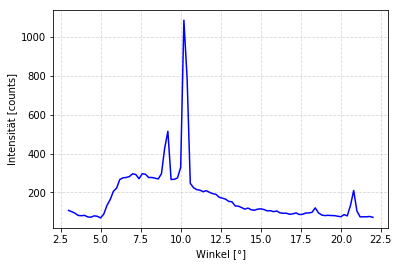

In [4]:
#%matplotlib ipympl
plt.grid(alpha=0.5, linestyle='--')
plt.xlabel('Winkel [°]')
plt.ylabel('Intensität [counts]')
plt.plot(angle_1,inten_1, color='blue')
plt.savefig('./plots/A1a.pdf', format='PDF')

In [5]:
#background:
bkg = np.mean(inten_1[:10])
dbkg = np.std(inten_1[:10], ddof=1)/np.sqrt(10)
print('Hintergrund = ({} +/- {})counts'.format(bkg, dbkg))

inten_1 = inten_1 - bkg

Hintergrund = (84.98 +/- 3.699663648375499)counts


In [6]:
# beschränkung auf bereich zwischen 5 und 6.2 - Werte 11 bis 17
angle_1_lin = angle_1[10:17]
inten_1_lin = inten_1[10:17]

#stat. fehler:
dinten = np.sqrt((0.01 * inten_1_lin)**2 + dbkg**2)

def linfit(x, a,b):
    return a*x+b

popt_1, pcov_1 = curve_fit(linfit, angle_1_lin, inten_1_lin, sigma=dinten)

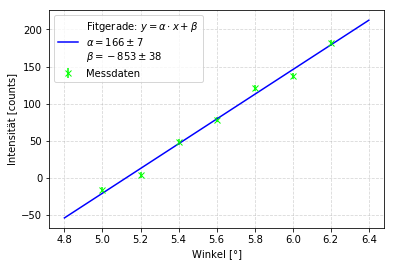

In [7]:
plt.grid(alpha=0.5, linestyle='--')
plt.xlabel('Winkel [°]')
plt.ylabel('Intensität [counts]')
plt.errorbar(angle_1_lin, inten_1_lin, yerr=dinten, fmt='x', color='lime', label='Messdaten')
x = np.linspace(4.8,6.4,100)
plt.plot(x, linfit(x, *popt_1), color='blue', 
        label="\n".join([r"Fitgerade: $y = \alpha \cdot x + \beta$", 
                          r'$\alpha ={:.0f}\pm{:.0f}$'.format(popt_1[0], np.sqrt(pcov_1[0][0])), 
                          r'$\beta ={:.0f}\pm{:.0f}$'.format(popt_1[1], np.sqrt(pcov_1[1][1]))]))
_ = plt.legend()
plt.savefig('./plots/A1b.pdf', format='PDF')

In [8]:
#grenzwellenlänge:
theta_gr_35 = - popt_1[1]/popt_1[0]
dtheta_gr_35 = theta_gr_35 * np.sqrt((np.sqrt(pcov_1[0][0])/popt_1[0])**2 + (np.sqrt(pcov_1[1][1])/popt_1[1])**2)
print('Grenzwinkel = ({} +/- {})°'.format(theta_gr_35, dtheta_gr_35))

d = 201.4e-12

lamb_gr_35 = 2 * d * np.sin(np.radians(theta_gr_35))
dlamb_gr_35 = 2 * d * np.cos(np.radians(theta_gr_35)) * np.radians(dtheta_gr_35)

print('Grenzwellenlänge = ({} +/- {})m'.format(lamb_gr_35, dlamb_gr_35))

Grenzwinkel = (5.124092937715125 +/- 0.31012283079239883)°
Grenzwellenlänge = (3.5975326890255045e-11 +/- 2.1715082114079383e-12)m


In [9]:
#planck:
h_1 = lamb_gr_35 * const.e * 35000 /const.c
dh_1 = dlamb_gr_35 * const.e * 35000 /const.c
print("Planck'sches Wirkungsquant h = ({} +/- {})Js".format(h_1, dh_1))
print('Literaturwert: h = {} Js'.format(const.h))

Planck'sches Wirkungsquant h = (6.729185245356466e-34 +/- 4.0618063210246797e-35)Js
Literaturwert: h = 6.62607015e-34 Js


In [10]:
#Signifikanztest:
sign_h_1 = np.abs(h_1 - const.h)/dh_1
print('sigma_h =', sign_h_1)

sigma_h = 0.2538651210982732


## Startwinkel des Spektrums 2. Ordnung

In [11]:
theta_start = np.arcsin(lamb_gr_35 /d)
dtheta_start = 1/np.sqrt(d**2 - lamb_gr_35**2) * dlamb_gr_35
print("Startwinkel 2. Ordnung = ({} +/- {})°".format(np.degrees(theta_start), np.degrees(dtheta_start)))

Startwinkel 2. Ordnung = (10.28975301540787 +/- 0.6278648607474591)°


# Zu Aufgabe 2

## Wellenlänge der K-Linien 1. und 2. Ordnung

In [12]:
angle_2a , inten_2a = np.loadtxt('./TeamChopper_2.txt', unpack=True, converters={0:comma_to_float, 1:comma_to_float})
angle_2b , inten_2b = np.loadtxt('./TeamChopper_2b.txt', unpack=True, converters={0:comma_to_float, 1:comma_to_float})

In [13]:
peaks_2a, _ = signal.find_peaks(inten_2a, height=400)
peaks_2b, _ = signal.find_peaks(inten_2b, height=100)

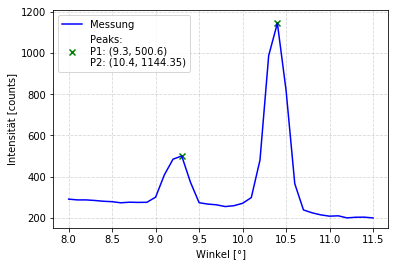

In [14]:
plt.grid(alpha=0.5, linestyle='--')
plt.xlabel('Winkel [°]')
plt.ylabel('Intensität [counts]')
plt.plot(angle_2a, inten_2a, color='blue', label='Messung')
plt.scatter(angle_2a[peaks_2a], inten_2a[peaks_2a], marker='x', color='green', 
            label="\n".join([r"Peaks:", 
                          r'P1: ({}, {})'.format(angle_2a[peaks_2a[0]], inten_2a[peaks_2a[0]]), 
                          r'P2: ({}, {})'.format(angle_2a[peaks_2a[1]], inten_2a[peaks_2a[1]])]))
_ = plt.legend()
plt.savefig('./plots/A2.1.pdf', format='PDF')

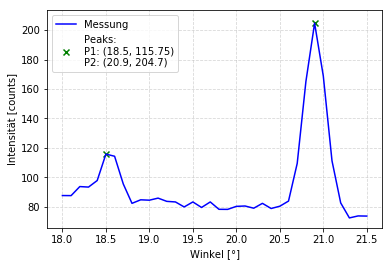

In [15]:
plt.grid(alpha=0.5, linestyle='--')
plt.xlabel('Winkel [°]')
plt.ylabel('Intensität [counts]')
plt.plot(angle_2b, inten_2b, color='blue', label='Messung')
plt.scatter(angle_2b[peaks_2b], inten_2b[peaks_2b], marker='x', color='green', 
            label="\n".join([r"Peaks:", 
                          r'P1: ({}, {})'.format(angle_2b[peaks_2b[0]], inten_2b[peaks_2b[0]]), 
                          r'P2: ({}, {})'.format(angle_2b[peaks_2b[1]], inten_2b[peaks_2b[1]])]))
_ = plt.legend()
plt.savefig('./plots/A2.2.pdf', format='PDF')

In [16]:
beta_kb1 = angle_2a[peaks_2a[0]]
beta_ka1 = angle_2a[peaks_2a[1]]
beta_kb2 = angle_2b[peaks_2b[0]]
beta_ka2 = angle_2b[peaks_2b[1]]

#abschätzung aus abstand zwischen den aufgenommenen Werten:
dbeta = 0.1

In [17]:
#Wellenlängen:
lamb_ka1 = 2 * d * np.sin(np.radians(beta_ka1))
lamb_kb1 = 2 * d * np.sin(np.radians(beta_kb1))
lamb_ka2 = d * np.sin(np.radians(beta_ka2))
lamb_kb2 = d * np.sin(np.radians(beta_kb2))
dlamb_ka1 = 2 * d * np.cos(np.radians(beta_ka1)) * np.radians(dbeta)
dlamb_kb1 = 2 * d * np.cos(np.radians(beta_kb1)) * np.radians(dbeta)
dlamb_ka2 = d * np.cos(np.radians(beta_ka2)) * np.radians(dbeta)
dlamb_kb2 = d * np.cos(np.radians(beta_kb2)) * np.radians(dbeta)

print('K_a1 = ({} +/- {})m'.format(lamb_ka1, dlamb_ka1))
print("K_b1 = ({} +/- {})m".format(lamb_kb1, dlamb_kb1))
print("K_a2 = ({} +/- {})m".format(lamb_ka2, dlamb_ka2))
print("K_b2 = ({} +/- {})m".format(lamb_kb2, dlamb_kb2))

K_a1 = (7.271311170692555e-11 +/- 6.914690607415013e-13)m
K_b1 = (6.509401914043387e-11 +/- 6.937779465552078e-13)m
K_a2 = (7.18470330629725e-11 +/- 3.283815714302227e-13)m
K_b2 = (6.390515779998556e-11 +/- 3.333445949800182e-13)m


In [18]:
ka_lit = 71.1e-12
kb_lit = 63.2e-12
sigma_ka1 = np.abs(lamb_ka1 - ka_lit)/np.sqrt(dlamb_ka1**2)
sigma_ka2 = np.abs(lamb_ka2 - ka_lit)/np.sqrt(dlamb_ka2**2)
sigma_kb1 = np.abs(lamb_kb1 - kb_lit)/np.sqrt(dlamb_kb1**2)
sigma_kb2 = np.abs(lamb_kb2 - kb_lit)/np.sqrt(dlamb_kb2**2)
print(sigma_ka1, sigma_ka2)
print(sigma_kb1, sigma_kb2)

2.332876188553856 2.2748933800361892
2.730007706122946 2.115401931229231


In [19]:
#tabelle:
ordn = np.array([1,1,2,2])
ab = np.array(['a','b','a','b'])
angles = np.array([beta_ka1, beta_kb1, beta_ka2, beta_kb2])
dangles = np.full(4, 0.1)
lambs = np.array([lamb_ka1, lamb_kb1, lamb_ka2, lamb_kb2])
dlambs = np.array([dlamb_ka1, dlamb_kb1, dlamb_ka2, dlamb_kb2])
sigs = np.array([sigma_ka1, sigma_kb1, sigma_ka2, sigma_kb2])

head1 = ['Ordn', 'a/b', 'angle', 'da', 'lamb', 'dl', 'sig']
tab1 = zip(ordn, ab, angles, dangles, lambs, dlambs, sigs)

print(tabulate(tab1, headers=head1, tablefmt="latex"))

\begin{tabular}{rlrrrrr}
\hline
   Ordn & a/b   &   angle &   da &        lamb &          dl &     sig \\
\hline
      1 & a     &    10.4 &  0.1 & 7.27131e-11 & 6.91469e-13 & 2.33288 \\
      1 & b     &     9.3 &  0.1 & 6.5094e-11  & 6.93778e-13 & 2.73001 \\
      2 & a     &    20.9 &  0.1 & 7.1847e-11  & 3.28382e-13 & 2.27489 \\
      2 & b     &    18.5 &  0.1 & 6.39052e-11 & 3.33345e-13 & 2.1154  \\
\hline
\end{tabular}


## Bestimmung der Halbwertsbreite für die Linien 1. Ordnung

In [20]:
def gaussian(x, mu, sig, a, bkg): #bkg = background
    return a/(sig * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mu)/sig)**2) + bkg 

In [21]:
popt_ka1, pcov_ka1 = curve_fit(gaussian, angle_2a[:20], inten_2a[:20], p0=[9.5,0.2,500,220])
print(popt_ka1)

[9.24062762e+00 1.18287079e-01 7.19091385e+01 2.74097931e+02]


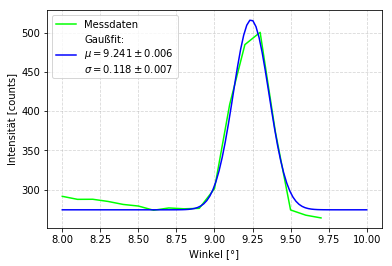

In [22]:
plt.grid(alpha=0.5, linestyle='--')
plt.xlabel('Winkel [°]')
plt.ylabel('Intensität [counts]')
plt.plot(angle_2a[:18], inten_2a[:18], color='lime', label='Messdaten')
x = np.linspace(8,10,100)
plt.plot(x, gaussian(x, *popt_ka1), color='blue', 
        label="\n".join([r"Gaußfit:", 
                          r'$\mu ={:.3f}\pm{:.1}$'.format(popt_ka1[0], np.sqrt(pcov_ka1[0][0])), 
                          r'$\sigma ={:.3f}\pm{:.1}$'.format(popt_ka1[1], np.sqrt(pcov_ka1[1][1]))]))
_ = plt.legend()
plt.savefig('./plots/A2hwb.pdf', format='PDF')

# Zu Aufgabe 3

In [23]:
U = np.arange(20,36)
rate = np.array([1.65, 3.40, 3.85, 5.5, 14.4, 36.55, 67.45, 95.55, 119, 147.4, 168.4, 197.8, 223.2, 248.0, 268.4, 293.5])

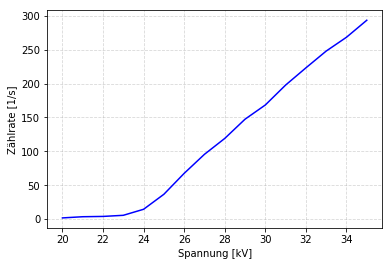

In [24]:
plt.grid(alpha=0.5, linestyle='--')
plt.xlabel('Spannung [kV]')
plt.ylabel('Zählrate [1/s]')
plt.plot(U,rate, color='blue')
plt.savefig('./plots/A3.1.pdf', format='PDF')

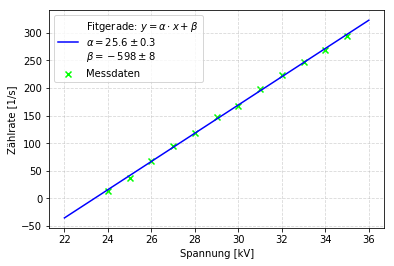

In [25]:
#extrapolation der linearen werte:
U_lin = U[4:]
rate_lin = rate[4:]

popt_3, pcov_3 = curve_fit(linfit, U_lin, rate_lin)

plt.grid(alpha=0.5, linestyle='--')
plt.xlabel('Spannung [kV]')
plt.ylabel('Zählrate [1/s]')
plt.scatter(U_lin, rate_lin, color='lime', marker='x', label='Messdaten')
x = np.linspace(22,36,100)
plt.plot(x, linfit(x, *popt_3), color='blue', 
        label="\n".join([r"Fitgerade: $y = \alpha \cdot x + \beta$", 
                          r'$\alpha ={:.1f}\pm{:.1}$'.format(popt_3[0], np.sqrt(pcov_3[0][0])), 
                          r'$\beta ={:.0f}\pm{:.0f}$'.format(popt_3[1], np.sqrt(pcov_3[1][1]))]))
_ = plt.legend()
plt.savefig('./plots/A3fit.pdf', format='PDF')

In [26]:
#grenzspannung:
U_gr = - popt_3[1]/popt_3[0]
dU_gr = U_gr * np.sqrt((np.sqrt(pcov_3[0][0])/popt_3[0])**2 + (np.sqrt(pcov_3[1][1])/popt_3[1])**2)
print('Grenzspannung = ({} +/- {})kV'.format(U_gr, dU_gr))

Grenzspannung = (23.376873398337334 +/- 0.3778752487336699)kV


In [27]:
beta = 7.5 #°

#planck:
h_2 = 2 * d * np.sin(np.radians(beta)) * const.e * U_gr * 1000 /const.c
dh_2 = 2 * d * np.sin(np.radians(beta)) * const.e * dU_gr * 1000 /const.c
print("Planck'sches Wirkungsquant h = ({} +/- {})Js".format(h_2, dh_2))
print('Literaturwert: h = {} Js'.format(const.h))

Planck'sches Wirkungsquant h = (6.568455262011514e-34 +/- 1.0617573289784417e-35)Js
Literaturwert: h = 6.62607015e-34 Js


In [28]:
#Signifikanztest:
sign_h_2 = np.abs(h_2 - const.h)/dh_2
print('sigma_h =', sign_h_2)

sigma_h = 0.5426370641954453


# Zu Aufgabe 4

## Position der K-Linien

In [29]:
angle_4, inten_4 = np.loadtxt('./TeamChopper_4.txt', unpack=True, converters={0:comma_to_float, 1:comma_to_float})

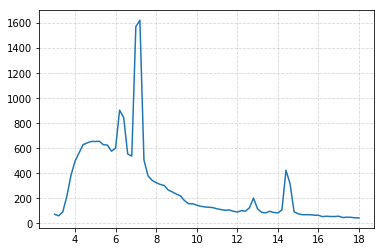

In [30]:
plt.plot(angle_4, inten_4)
plt.grid(alpha=0.5, linestyle='--')

In [31]:
peaks_4a, _ = signal.find_peaks(inten_4, height=700)
peaks_4b, _ = signal.find_peaks(inten_4[46:], height=150)

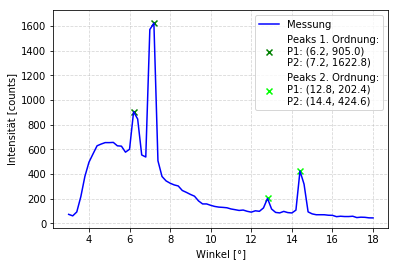

In [32]:
plt.grid(alpha=0.5, linestyle='--')
plt.xlabel('Winkel [°]')
plt.ylabel('Intensität [counts]')
plt.plot(angle_4, inten_4, color='blue', label='Messung')
plt.scatter(angle_4[peaks_4a], inten_4[peaks_4a], marker='x', color='green', 
            label="\n".join([r"Peaks 1. Ordnung:", 
                          r'P1: ({}, {})'.format(angle_4[peaks_4a[0]], inten_4[peaks_4a[0]]), 
                          r'P2: ({}, {})'.format(angle_4[peaks_4a[1]], inten_4[peaks_4a[1]])]))
plt.scatter(angle_4[46 + peaks_4b], inten_4[46 + peaks_4b], marker='x', color='lime', 
            label="\n".join([r"Peaks 2. Ordnung:", 
                          r'P1: ({}, {})'.format(angle_4[46 + peaks_4b[0]], inten_4[46 + peaks_4b[0]]), 
                          r'P2: ({}, {})'.format(angle_4[46 + peaks_4b[1]], inten_4[46 + peaks_4b[1]])]))
_ = plt.legend()
plt.savefig('./plots/A4.pdf', format='PDF')

## Gitterkonstante und Avogadro-Zahl

In [33]:
#Winkel der Peaks:
theta_ka1 = np.radians(angle_4[peaks_4a[1]])
theta_kb1 = np.radians(angle_4[peaks_4a[0]])
theta_ka2 = np.radians(angle_4[46 + peaks_4b[1]])
theta_kb2 = np.radians(angle_4[46 + peaks_4b[0]])

dtheta = np.radians(0.1)

In [34]:
#ergebnisse von teil 2
beta_ka1 = np.radians(beta_ka1)
beta_kb1 = np.radians(beta_kb1)
beta_ka2 = np.radians(beta_ka2)
beta_kb2 = np.radians(beta_kb2)
dbeta = np.radians(dbeta)

In [35]:
d_ka1 = d * np.sin(beta_ka1)/np.sin(theta_ka1)
d_kb1 = d * np.sin(beta_kb1)/np.sin(theta_kb1)
d_ka2 = d * np.sin(beta_ka2)/np.sin(theta_ka2)
d_kb2 = d * np.sin(beta_kb2)/np.sin(theta_kb2)

dd_ka1 = d * np.sqrt((dbeta * np.cos(beta_ka1)/np.sin(theta_ka1))**2 + (dtheta * np.sin(beta_ka1) * np.cos(theta_ka1) /(np.sin(theta_ka1)**2))**2)
dd_kb1 = d * np.sqrt((dbeta * np.cos(beta_kb1)/np.sin(theta_kb1))**2 + (dtheta * np.sin(beta_kb1) * np.cos(theta_kb1) /(np.sin(theta_kb1)**2))**2)
dd_ka2 = d * np.sqrt((dbeta * np.cos(beta_ka2)/np.sin(theta_ka2))**2 + (dtheta * np.sin(beta_ka2) * np.cos(theta_ka2) /(np.sin(theta_ka2)**2))**2)
dd_kb2 = d * np.sqrt((dbeta * np.cos(beta_kb2)/np.sin(theta_kb2))**2 + (dtheta * np.sin(beta_kb2) * np.cos(theta_kb2) /(np.sin(theta_kb2)**2))**2)

In [36]:
#mittelwert:
ds = np.array([d_ka1, d_ka2, d_kb1, d_kb2])
dds = np.array([dd_ka1, dd_ka2, dd_kb1, dd_kb2])

d_NaCl = np.mean(ds)
dd_NaCl = np.sqrt((np.std(ds, ddof=1)/np.sqrt(4))**2 + (1/4 * np.sum(dds))**2)

print("Netzebenenabstand NaCl d = ({} +/- {})m".format(d_NaCl, dd_NaCl))

Netzebenenabstand NaCl d = (2.921979889517671e-10 +/- 4.9896772917326705e-12)m


In [37]:
#tabelle:
thetas = np.degrees(np.array([theta_ka1, theta_kb1, theta_ka2, theta_kb2]))
dthetas = np.full(4, 0.1)


head2 = ['Ordn', 'a/b', 'theta', 'dtheta', 'beta', 'dbeta', 'd', 'dd']
tab2 = zip(ordn, ab, thetas, dthetas, angles, dangles, ds, dds)

print(tabulate(tab2, headers=head2, tablefmt="latex"))

\begin{tabular}{rlrrrrrr}
\hline
   Ordn & a/b   &   theta &   dtheta &   beta &   dbeta &           d &          dd \\
\hline
      1 & a     &     7.2 &      0.1 &   10.4 &     0.1 & 2.90079e-10 & 4.86525e-12 \\
      1 & b     &     6.2 &      0.1 &    9.3 &     0.1 & 2.88902e-10 & 2.36649e-12 \\
      2 & a     &    14.4 &      0.1 &   20.9 &     0.1 & 3.01363e-10 & 5.81023e-12 \\
      2 & b     &    12.8 &      0.1 &   18.5 &     0.1 & 2.88448e-10 & 2.67843e-12 \\
\hline
\end{tabular}


In [38]:
#Avogadro:
M_NaCl = 58.44e-3 #kg
rho_NaCl = 2.164e3 #kg/m^3

NA = 0.5 * M_NaCl /(rho_NaCl * d_NaCl**3)
dNA = NA * np.sqrt((3 * dd_NaCl/d_NaCl)**2)

NA_lit = 6.0221e23

print("Avogadrozahl N_A = ({} +/- {})1/mol".format(NA, dNA))
print("Literaturwert N_A = ({})1/mol".format(NA_lit))

Avogadrozahl N_A = (5.4124174730035766e+23 +/- 2.772731255472224e+22)1/mol
Literaturwert N_A = (6.0221e+23)1/mol


In [39]:
sign_NA = np.abs(NA - NA_lit)/dNA

print("Sigma_N_A = {}".format(sign_NA))

Sigma_N_A = 2.1988518569665287
